In [1]:
import pandas as pd 
import matplotlib.pyplot as mp
import numpy
import tkinter as tk 
from tkinter import filedialog, Text
import os

C:\Users\Arie\AppData\Local\Temp/ipykernel_9176/2822140847.py:39: RuntimeWarning: invalid value encountered in double_scalars
  per = ((change/average) *100)


<AxesSubplot:title={'center':'Percentage standaardafwijking vs gemiddelde fitting score per file'}, ylabel='Files'>

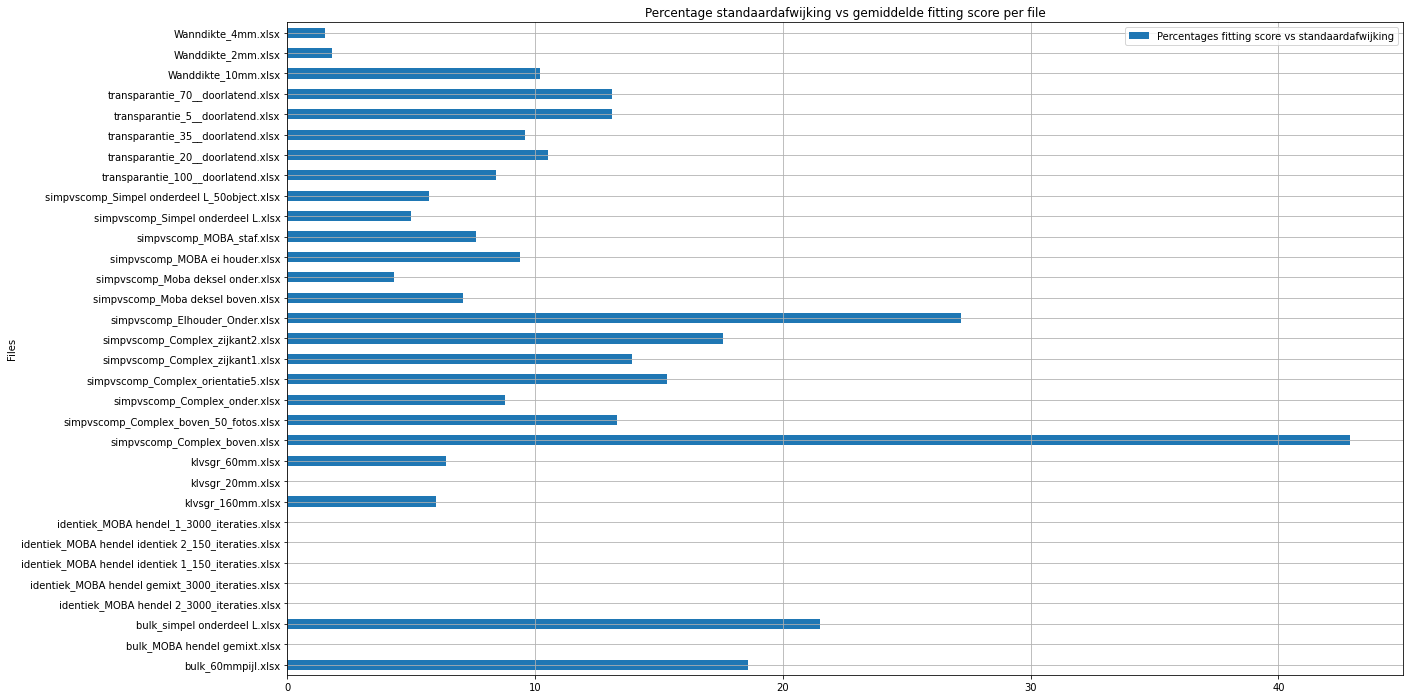

In [4]:
#This program calculates the percentage of change compared to the average fitting score of all the excel sheets
#Author: Arie Hoekstra

#Directory we want to search
directory = "Excel Resultaten"
#List to store all the files with path
excel = []
#List with just the file names
files = []
y = 0

#Loop over all the files in the directory    
for file in os.listdir(directory):
    #decode
     filename = os.fsdecode(file)
     if filename.endswith(".xlsx"):
         #store path to file in temp variable
         temp = os.path.join(directory, filename) 
         #insert into the excel
         excel.insert(y, temp)
         y = y + 1
         continue
     else:
         continue

i = 0
#array to store all calculated percentages
percentages = []

#Loop over all the excel sheets
for sheet in excel:
    #Select the E column (total score)
    df = pd.read_excel(sheet, usecols="E")
    #Retrieve average fitting score
    average = df.iat[25,0]
    #Retrieve the change value
    change = df.iat[26,0]
    try:
        #Calculate percentage
        per = ((change/average) *100)
        per = round(per, 1)
    except ZeroDivisionError:
        per = 0
    #inserit into the percentages array
    percentages.insert(i, per)
    #Delete directory from path
    files.insert(i, sheet.replace('Excel Resultaten\\', ''))
    i = i + 1

#Create dataframe
df = pd.DataFrame()
#Add two columns with the names and the corresponding percentage
df['Percentages fitting score vs standaardafwijking'] = percentages
df['Files'] = files

#Export dataframe to excel 
df.to_excel('totalscore.xlsx', index=False)

#Get data from the excel
df = pd.read_excel('totalscore.xlsx')
#Plot the graph
df.plot(x='Files', kind="barh", figsize=(20,12), xlabel="Files", ylabel = "Percentage", title="Percentage standaardafwijking vs gemiddelde fitting score per file", grid=True)